In [1]:
import numpy as np
from matplotlib import pyplot as plt
from dataclasses import dataclass
from echospec.utils.parameters import Parameters
from echospec.experiments.spectroscopy import Spectroscopy, Options

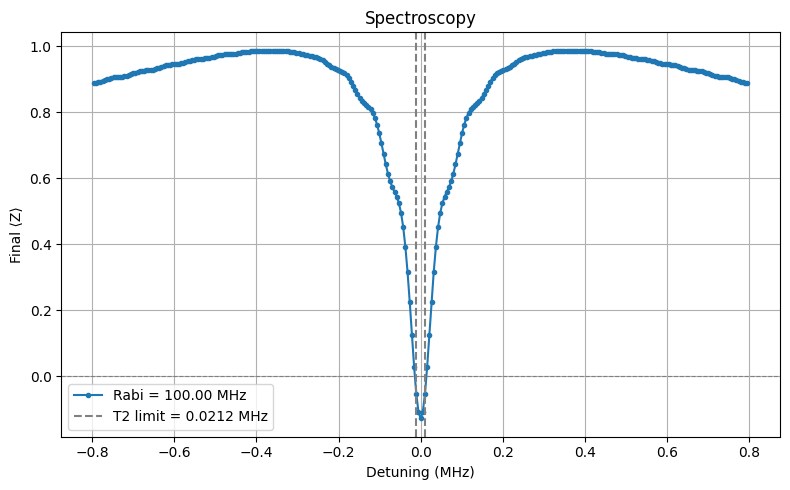

In [2]:
params = Parameters()
params.cutoff = 5e-5
params.pulse_length = 30e-6
params.detuning_points = 301
params.eco_pulse = False
options = Options(plot=True)

detunings = np.linspace(-5e6, 5e6, 301)

spectroscopy = Spectroscopy(
    detunings,
    params,
    options=options
    )
results = spectroscopy.run()

In [3]:
ts = results.data["time"].values
detunings = results.data["detuning"].values
final_x = results.data.sel(observable="z").isel(time=-1)

interactive(children=(IntSlider(value=50, description='Detuning', max=300), Output()), _dom_classes=('widget-i…

<function __main__.update(detuning_index)>

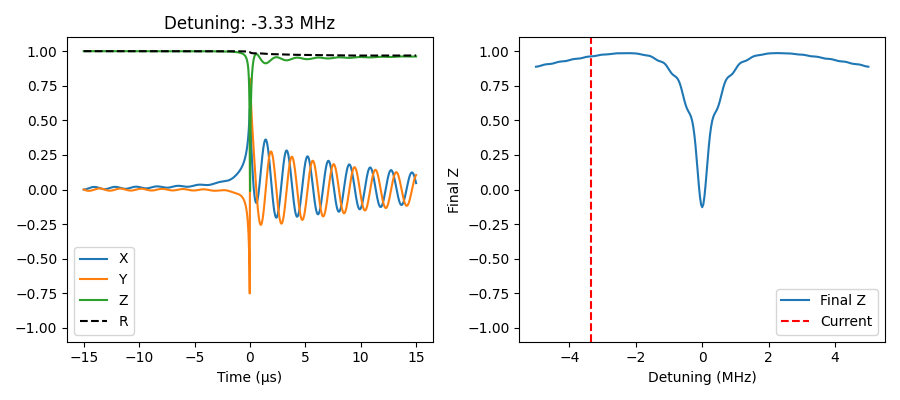

In [5]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# ---- create figure ONCE ----
fig, axs = plt.subplots(1,2,figsize=(9, 4))

# initial index
idx0 = 50
det0 = detunings[idx0]

x0 = results.data.sel(observable="x", detuning=det0)
y0 = results.data.sel(observable="y", detuning=det0)
z0 = results.data.sel(observable="z", detuning=det0)
r0 = np.sqrt(x0**2 + y0**2 + z0**2)

ax = axs[0]
(line_x,) = ax.plot(ts * 1e6, x0, label="X")
(line_y,) = ax.plot(ts * 1e6, y0, label="Y")
(line_z,) = ax.plot(ts * 1e6, z0, label="Z")
(line_r,) = ax.plot(ts * 1e6, r0, "--", color="black", label="R")

ax.set_xlabel("Time (µs)")
ax.legend()
ax.set_ylim(-1.1, 1.1)
title = ax.set_title(f"Detuning: {det0/1e6:.2f} MHz")

# ---- second plot: spectroscopy curve ----
ax2 = axs[1]
ax2.plot(detunings / 1e6, final_x, label="Final Z")
vline = ax2.axvline(det0 / 1e6, color='red', linestyle='--', label='Current')
ax2.set_xlabel("Detuning (MHz)")
ax2.set_ylabel("Final Z")
ax2.legend()
ax2.set_ylim(-1.1, 1.1)

fig.tight_layout()
fig.canvas.draw_idle()


# ---- update function ----
def update(detuning_index):
    detuning = detunings[detuning_index]

    x = results.data.sel(observable="x", detuning=detuning)
    y = results.data.sel(observable="y", detuning=detuning)
    z = results.data.sel(observable="z", detuning=detuning)
    r = np.sqrt(x**2 + y**2 + z**2)

    line_x.set_ydata(x)
    line_y.set_ydata(y)
    line_z.set_ydata(z)
    line_r.set_ydata(r)

    title.set_text(f"Detuning: {detuning/1e6:.2f} MHz")
    
    # Update vertical line position
    vline.set_xdata([detuning / 1e6])

    fig.canvas.draw_idle()


interact(
    update,
    detuning_index=IntSlider(
        min=0,
        max=len(detunings) - 1,
        step=1,
        value=idx0,
        description="Detuning",
        continuous_update=True,
    ),
)